In [2]:
from manim import *
from numpy import linalg as npl
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline

video_scene = " -v WARNING --progress_bar None --disable_caching traj_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s traj_Scene"

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.8


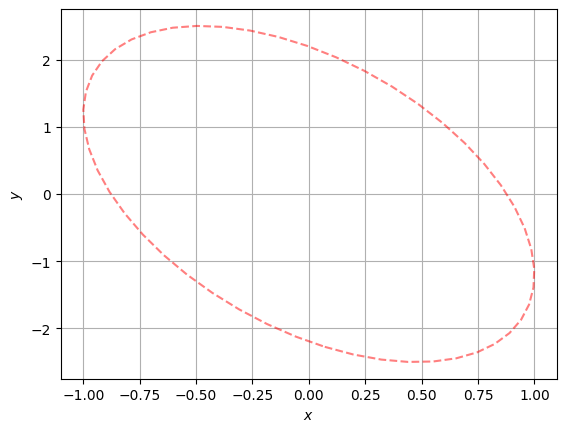

In [3]:
def traj1(t):
    x = 1 * np.cos(t-1.5)
    y = 2.5 * np.sin(t-2) 
    return np.array([x, y])

t = np.linspace(0, 2*PI, 50)

fig, ax = plt.subplots()

ax.plot(traj1(t)[0], traj1(t)[1], color = 'red', alpha = 0.5, linestyle = '--')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.grid()
plt.show()

In [4]:
%%capture_video --path "animations/trajectory/trajectory.mp4"
%%manim -qk --fps 60 $video_scene

class traj_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)
        time = ValueTracker(0)

        # Coordinates
        cart_base = np.array([-5, 2, 0])
        rad_base = np.array([-5, -2, 0])

        ax1_base = np.array([-0.5, 2, 0])
        ax2_base = np.array([4.5, 2, 0])
        ax3_base = np.array([-0.5, -2, 0])
        ax4_base = np.array([4.5, -2, 0])


        # Coordinate Systems
        npla = NumberPlane(
            x_range = [-3, 3, 1], y_range = [-3, 3, 1], x_length = 3, y_length = 3, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}).move_to(cart_base)
        ppla = PolarPlane(
            radius_max = 3, size = 3, tips = True,
            x_axis_config = {"stroke_opacity": 0.25}, y_axis_config = {"stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}).move_to(rad_base)

        phi_dict = dict(zip([-2, -1, 0, 1, 2], [r'$-2\pi$', r'$-\pi$', 0, r'$\pi$', r'$2\pi$'])) 
        x_range = [0, 2.25*PI, PI/4]

        x_dict = dict(zip([PI/2, PI, 3/2*PI, 2*PI], [1, 2, 3, 4]))
        y_dict = dict(zip([-2, -1, 0, 1, 2], [-2, -1, 0, 1, 2]))

        ax1_ax = Axes(x_range = x_range, y_range = [-3, 3, 1], x_length = 8, y_length = 6).move_to(ax1_base).add_coordinates(x_dict, y_dict).scale(0.5)
        ax1_xlabel = ax1_ax.get_x_axis_label(Text("t")).scale(0.4)
        ax1_ylabel = ax1_ax.get_y_axis_label(Text("y")).scale(0.4)
        ax1 = VGroup(ax1_ax, ax1_xlabel, ax1_ylabel)

        ax2_ax = Axes(x_range = x_range, y_range = [-3, 3, 1], x_length = 8, y_length = 6).move_to(ax2_base).add_coordinates(x_dict, y_dict).scale(0.5)
        ax2_xlabel = ax2_ax.get_x_axis_label(Text("t")).scale(0.4)
        ax2_ylabel = ax2_ax.get_y_axis_label(Text("x")).scale(0.4)
        ax2 = VGroup(ax2_ax, ax2_xlabel, ax2_ylabel)

        ax3_ax = Axes(x_range = x_range, y_range = [-3, 3, 1], x_length = 8, y_length = 6).move_to(ax3_base).add_coordinates(x_dict, y_dict).scale(0.5)
        ax3_xlabel = ax3_ax.get_x_axis_label(Text("t")).scale(0.4)
        ax3_ylabel = ax3_ax.get_y_axis_label(Text("r")).scale(0.4)
        ax3 = VGroup(ax3_ax, ax3_xlabel, ax3_ylabel)

        ax4_ax = Axes(x_range = x_range, y_range = [-3, 3, 1], x_length = 8, y_length = 6).move_to(ax4_base).add_coordinates(x_dict, phi_dict).scale(0.5)
        ax4_xlabel = ax4_ax.get_x_axis_label(Text("t")).scale(0.4)
        ax4_ylabel = ax4_ax.get_y_axis_label(Tex(r'$\varphi$')).scale(0.6)
        ax4 = VGroup(ax4_ax, ax4_xlabel, ax4_ylabel)
        

        # Points
        npp = Dot(npla.coords_to_point(traj1(0)[0], traj1(0)[1]), color = RED, radius = 0.05)  
        ppp = Dot(ppla.coords_to_point(traj1(0)[0], traj1(0)[1]), color = RED, radius = 0.05)

        ax1_dot = Dot(ax1_ax.coords_to_point(0, traj1(0)[1]), color = RED, radius = 0.05)
        ax2_dot = Dot(ax2_ax.coords_to_point(0, traj1(0)[0]), color = RED, radius = 0.05)
        ax3_dot = Dot(ax3_ax.coords_to_point(0, np.linalg.norm(traj1(0))), color = RED, radius = 0.05)
        ax4_dot = Dot(ax4_ax.coords_to_point(0, ((np.arctan2(traj1(0)[1], traj1(0)[0])+2*PI) % (2*PI) ) / PI), color = RED, radius = 0.05)

        def dot_np_updater(dot):
            t = time.get_value()
            self.add(Line(start = dot.get_center(), end = npla.coords_to_point(traj1(t)[0], traj1(t)[1]), color = RED).set_opacity(0.25))
            dot.move_to(npla.coords_to_point(traj1(t)[0], traj1(t)[1]))

        def dot_pp_updater(dot):
            t = time.get_value()
            self.add(Line(start = dot.get_center(), end = ppla.coords_to_point(traj1(t)[0], traj1(t)[1]), color = RED).set_opacity(0.25))
            dot.move_to(ppla.coords_to_point(traj1(t)[0], traj1(t)[1]))

        def ax1_dot_updater(ax_dot):
            t = time.get_value()
            if t != 0:
                self.add(Line(start = ax_dot.get_center(), end = ax1_ax.coords_to_point(t, traj1(t)[1])).set_opacity(0.25))
            ax_dot.move_to(ax1_ax.coords_to_point(t, traj1(t)[1]))

        def ax2_dot_updater(ax_dot):
            t = time.get_value()
            if t != 0:
                self.add(Line(start = ax_dot.get_center(), end = ax2_ax.coords_to_point(t, traj1(t)[0])).set_opacity(0.25))
            ax_dot.move_to(ax2_ax.coords_to_point(t, traj1(t)[0]))

        def ax3_dot_updater(ax_dot):
            t = time.get_value()
            if t != 0:
                self.add(Line(start = ax_dot.get_center(), end = ax3_ax.coords_to_point(t, np.linalg.norm(traj1(t)))).set_opacity(0.25))
            ax_dot.move_to(ax3_ax.coords_to_point(t, np.linalg.norm(traj1(t))))

        def ax4_dot_updater(ax_dot):
            t = time.get_value()
            if t != 0:
                self.add(Line(start = ax_dot.get_center(), end = ax4_ax.coords_to_point(t, ((np.arctan2(traj1(t)[1], traj1(t)[0]) + 2*PI) % (2*PI) ) / PI)).set_opacity(0.25))
            ax_dot.move_to(ax4_ax.coords_to_point(t, ((np.arctan2(traj1(t)[1], traj1(t)[0]) + 2*PI) % (2*PI) ) / PI))
        

        # Lines
        cart_lines = npla.get_lines_to_point(npla.c2p(traj1(0)[0], traj1(0)[1])).set_color(RED)
        rad_line = DashedLine(ppla.pr2pt(0, 0), ppla.pr2pt(traj1(0)[0], traj1(0)[1]), color = RED, stroke_width = 2)
        arc = Arc(arc_center = rad_base, radius = np.linalg.norm(traj1(0)) / 2, angle = (np.arctan2(traj1(0)[1], traj1(0)[0]) + 2*PI) % (2*PI), color = RED)

        def cart_line_updater(line):
            t = time.get_value()
            line.become(npla.get_lines_to_point(npla.c2p(traj1(t)[0], traj1(t)[1])).set_color(RED))

        def rad_line_updater(line):
            t = time.get_value()
            line.become(DashedLine(start = rad_base, end = ppla.coords_to_point(traj1(t)[0], traj1(t)[1]), color = RED, stroke_width = 2))

        def arc_updater(line):
            t = time.get_value()
            line.become(Arc(arc_center = rad_base, radius = np.linalg.norm(traj1(t)) / 2, angle = (np.arctan2(traj1(t)[1], traj1(t)[0]) + 2*PI) % (2*PI), color = RED))


        # Play 
        self.play(FadeIn(npla), FadeIn(ppla), FadeIn(npp), FadeIn(ppp), FadeIn(cart_lines), FadeIn(rad_line), Create(ax1), Create(ax2), Create(ax3), Create(ax4), run_time = 3)
        self.play(Create(ax1_dot), Create(ax2_dot), Create(ax3_dot), Create(ax4_dot))#, Create(arc))

        npp.add_updater(dot_np_updater)
        ppp.add_updater(dot_pp_updater)

        ax1_dot.add_updater(ax1_dot_updater)
        ax2_dot.add_updater(ax2_dot_updater)
        ax3_dot.add_updater(ax3_dot_updater)
        ax4_dot.add_updater(ax4_dot_updater)

        cart_lines.add_updater(cart_line_updater)
        rad_line.add_updater(rad_line_updater)
        #arc.add_updater(arc_updater)

        self.play(time.animate.set_value(2*PI), rate_func= linear, run_time = 4)
        time.set_value(0)
        self.play(time.animate.set_value(2*PI), rate_func= linear, run_time = 4)
        time.set_value(0)
        self.play(time.animate.set_value(2*PI), rate_func= linear, run_time = 4)
        time.set_value(0)
        self.play(time.animate.set_value(2*PI), rate_func= linear, run_time = 4)

Output saved by overwring previous file at animations/trajectory/trajectory.mp4.
